Se monta Google Drive personal donde están los datasets alojados. Así no se pierden cuando expire la sesión


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Se importan paquetes y librerías necesarias en Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se descargan los dataset de drive

In [ ]:
company = pd.read_csv('drive/MyDrive/TFG ADE/Company.csv')
company_tweet = pd.read_csv('drive/MyDrive/TFG ADE/Company_Tweet.csv')
tweet = pd.read_csv('drive/MyDrive/TFG ADE/Tweet.csv')

Se obtiene la información general sobre el dataset con los tweets

In [ ]:
print(tweet.head())
print(tweet.info())
print(tweet.describe())

             tweet_id           writer   post_date  \
0  550441509175443456  VisualStockRSRC  1420070457   
1  550441672312512512      KeralaGuy77  1420070496   
2  550441732014223360      DozenStocks  1420070510   
3  550442977802207232     ShowDreamCar  1420070807   
4  550443807834402816     i_Know_First  1420071005   

                                                body  comment_num  \
0  lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1  Insanity of today weirdo massive selling. $aap...            0   
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

   retweet_num  like_num  
0            0         1  
1            0         0  
2            0         0  
3            0         1  
4            0         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (tota

Se limpia el dataset de tweets, eliminando NA's y duplicados. Además, se transforman los valores de la columna 'post_date' de epoch en segundos a fecha UTC en formato YYYY-MM-DD

In [ ]:
#limpieza inicial y convertir de epoch a fecha UTC
tweet.dropna() #eliminar NA
tweet.drop_duplicates() #eliminar duplicados
tweet['post_date'] = pd.to_datetime(tweet['post_date'], unit='s') #transformar de epoch en segundos a fecha UTC

Se obtiene la evolución temporal del número de tweets publicados

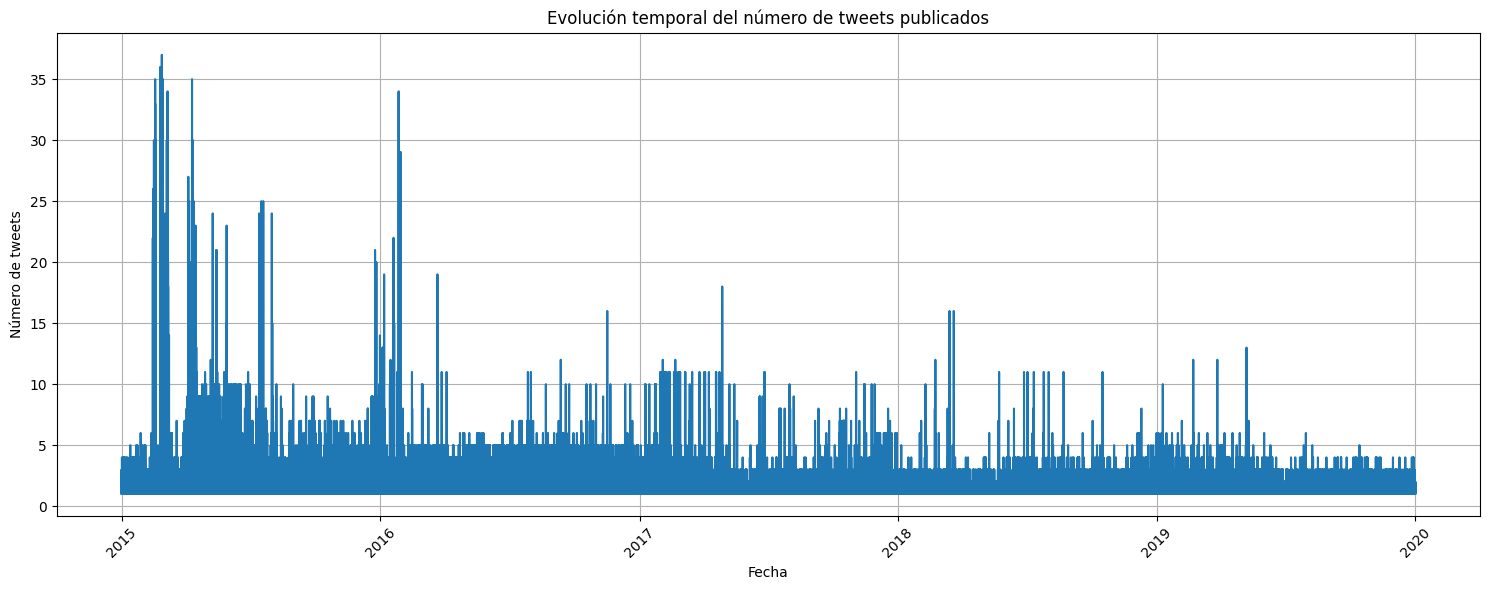

In [ ]:
#evolucion temporal publicaciones
tweet_count_per_day = tweet['post_date'].value_counts().reset_index()
tweet_count_per_day.columns = ['Date', 'Tweet Count']
tweet_count_per_day = tweet_count_per_day.sort_values(by='Date')
plt.figure(figsize=(15, 6))
plt.plot(tweet_count_per_day['Date'], tweet_count_per_day['Tweet Count'])

plt.title('Evolución temporal del número de tweets publicados')
plt.xlabel('Fecha')
plt.ylabel('Número de tweets')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Se unen los conjuntos de datos, se eliminan las columnas no relevantes para el análisis y se guarda el dataset resultante para no perderlo cuando expire la sesión

In [ ]:
#merge y eliminar columnas
data_n= pd.merge(tweet, company_tweet)
data_n= pd.merge(data_n, company)
data_n['company_name'] = data_n['company_name'].replace("apple", "Apple")
data_n= data_n.drop(columns=['writer','comment_num', 'retweet_num', 'like_num', 'ticker_symbol'])
data_n.to_csv('drive/MyDrive/TFG ADE/Data_Total_Sincolumnas.csv')

Se obtienen representaciones del conjunto total de datos: diagramas de barras y gráfico circular

In [ ]:
#representaciones conjunto total de datos
#porcentaje discusion
value_counts = data_n['company_name'].value_counts()
# Create the histogram
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Nombre compañía')
plt.ylabel('Frecuencia')
plt.title('Número de Tweets en los que se menciona cada marca')
# Show the histogram
plt.show()

#piechart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
# Set labels and title
plt.xlabel('Nombre compañía')
plt.ylabel('Frecuencia')
plt.title('% de Tweets en los que se menciona cada marca')
# Show the histogram
plt.show()

Se obtiene la evolución temporal del número de tweets publicados por empresa

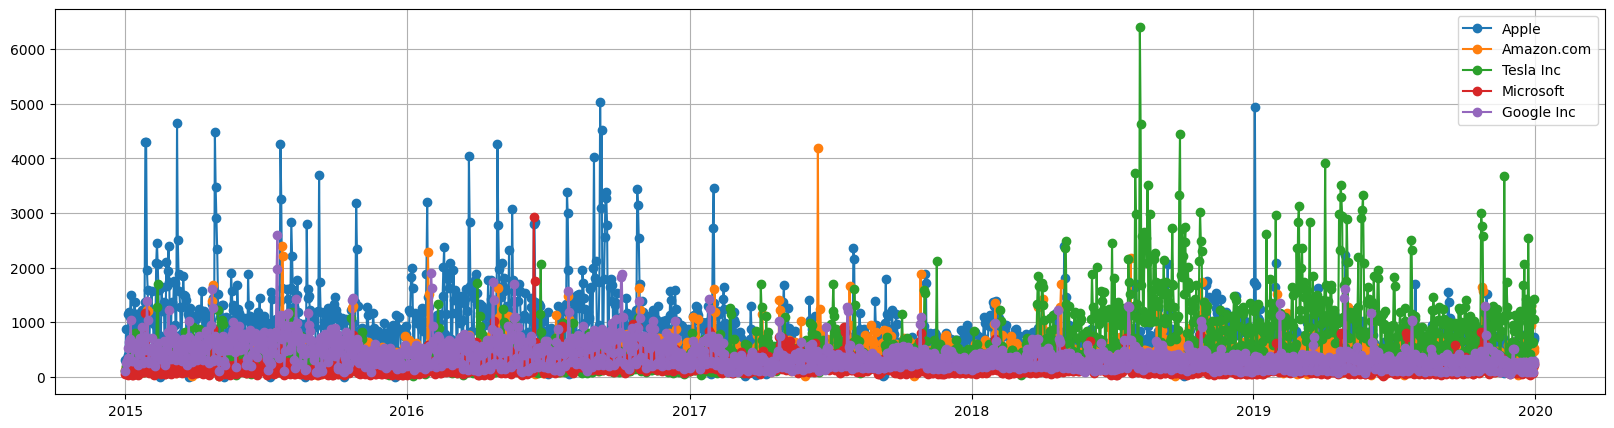

"#evolucion temporal con filtro\nfecha_inicio = '2015-10-01'\nfecha_fin = '2016-02-01'\n#filtro = (data_n['post_date']>= fecha_inicio) & ((data_n['post_date']<= fecha_fin) & (data_n['company_name']=='Apple'))\nfiltro = (data_n['post_date']>= fecha_inicio) & ((data_n['post_date']<= fecha_fin))\ndata_extra = data_n[filtro]\nplt.figure(figsize=(20, 5))\n\nfor comp in companies:\n  company_tweets = data_extra[data_extra['company_name'] == comp]\n\n  # Group the data by day and count the number of tweets per day\n  t_per_day = company_tweets.resample('D', on='post_date').count()\n\n\n\n  # Create a temporal representation of tweet counts\n  plt.plot(t_per_day.index, t_per_day['tweet_id'], marker='o', linestyle='-', label=comp)\n\n# Set labels and title\nplt.xlabel('Fecha')\nplt.ylabel('Número de Tweets')\nplt.title('Evolución temporal del número de tweets sobre cada compañía')\n\n# Show the plot\nplt.grid(True)\nplt.legend()\nplt.show()\n\n# Plot the daily changes in tweets\nplt.figure(figs

In [ ]:
#evolucion temporal conjunto total
companies = ['Apple', 'Amazon.com', 'Tesla Inc', 'Microsoft', 'Google Inc']
plt.figure(figsize=(20, 5))

for comp in companies:
  company_tweets = data_n[data_n['company_name'] == comp]

  # Group the data by day and count the number of tweets per day
  t_per_day = company_tweets.resample('D', on='post_date').count()
  #daily_diff = t_per_day.diff()
  # Create a temporal representation of tweet counts
  plt.plot(t_per_day.index, t_per_day['tweet_id'], marker='o', linestyle='-', label=comp)
 #plt.plot(daily_diff.index, daily_diff.values, marker='o')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()

Debido al elevado volumen de datos, se aplica un filtro temporal al conjunto para analizar únicamente los tweets más recientes, publicados en los últimos 7 meses (del 01-06-2019 al 01-01-2020). Se guarda el dataset con filtro para no perderlo al expirar sesión

In [ ]:
#FILTROS FRANJA TEMPORAL INICIAL
fecha_inicio = '2019-06-01'
fecha_fin = '2020-01-01'
filtro = (data_n['post_date']>= fecha_inicio) & ((data_n['post_date']<= fecha_fin))

numero_elementos_filtrados = len(data_n[filtro])
print(numero_elementos_filtrados)

data_completo = data_n[filtro]
data_completo.to_csv('drive/MyDrive/TFG ADE/Data_Todas_FiltroTemporal.csv')


Se obtiene la evolución temporal del número de tweets en la franja temporal seleccionada

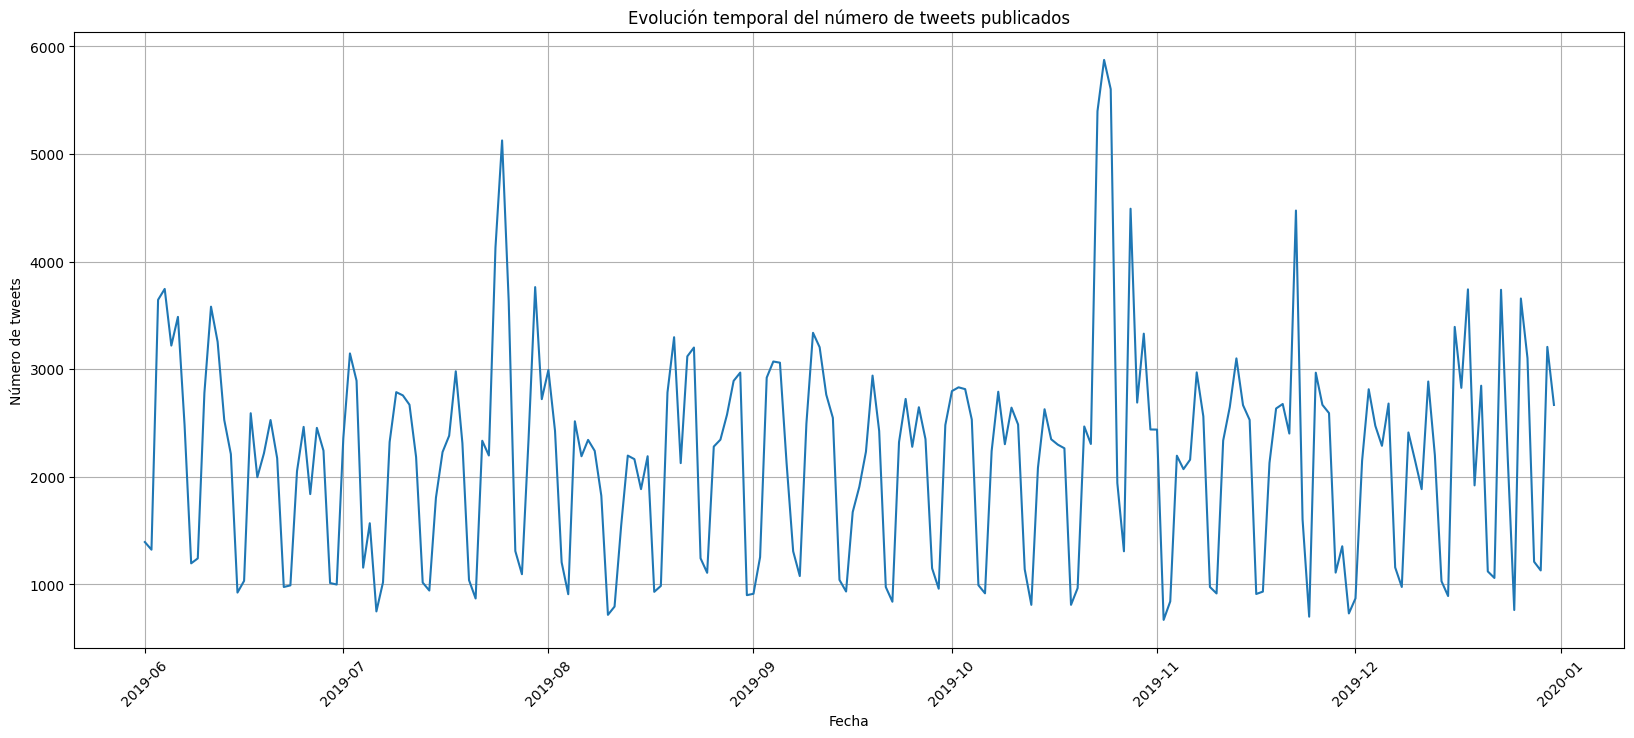

In [ ]:
#EVOLUCION TEMPORAL CON FILTRO FRANJA TEMPORAL
data_completo['post_date_only']= pd.to_datetime(data_completo['post_date']).dt.date
tweet_count_per_day = data_completo['post_date_only'].value_counts().reset_index()
tweet_count_per_day.columns = ['Date', 'Tweet Count']
tweet_count_per_day = tweet_count_per_day.sort_values(by='Date')
tweet_count_per_day.to_csv('drive/MyDrive/TFG ADE/Evolucion_Temporal_Tweets_Franja.csv')
plt.figure(figsize=(20, 8))
plt.plot(tweet_count_per_day['Date'], tweet_count_per_day['Tweet Count'])

plt.title('Evolución temporal del número de tweets publicados')
plt.xlabel('Fecha')
plt.ylabel('Número de tweets')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Se obtiene la evolución temporal del número de tweets por empresa en la franja temporal seleccionada

In [ ]:
# evolucion temporal franja por empresas

companies = ['Apple', 'Amazon.com', 'Tesla Inc', 'Microsoft', 'Google Inc']

for comp in companies:
  company_tweets = data_completo[data_completo['company_name'] == comp]

  # Group the data by day and count the number of tweets per day
  t_per_day = company_tweets.resample('D', on='post_date').count()
  columns_to_delete = ['body', 'company_name']
  t_per_day = t_per_day.drop(columns=columns_to_delete)
  t_per_day = t_per_day.rename(columns={'tweet_id': f'Tweet per day {comp}'})
  t_per_day.to_csv(f'drive/MyDrive/TFG ADE/{comp}.csv')


Se obtienen representaciones del conjunto total de datos en la franja seleccionada: diagramas de barras y gráfico circular

In [ ]:
#porcentaje discusion
value_counts = data_completo['company_name'].value_counts()
# Create the histogram
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Nombre compañía')
plt.ylabel('Frecuencia')
plt.title('Número de Tweets en los que se menciona cada marca')
# Show the histogram
plt.show()

#piechart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
# Set labels and title
plt.xlabel('Nombre compañía')
plt.ylabel('Frecuencia')
plt.title('% de Tweets en los que se menciona cada marca')
# Show the histogram
plt.show()

Debido a su menor relevancia en el corpus, se agrupan los tweets sobre las empresas Amazon, Google y Microsoft con el filtro temporal

In [ ]:
#obtener empresas no tesla o apple
datos_resto = data_completo[(data_completo['company_name'] != 'Apple') & (data_completo['company_name'] != 'Tesla Inc')]
datos_resto.head()
datos_resto.to_csv('drive/MyDrive/TFG ADE/Data_Google_Amazon_Microsoft.csv')

Se obtiene el dataset en la franja seleccionada de los tweets sobre Apple

In [ ]:
#APPLE
filtro = (data_n['post_date']>= fecha_inicio) & ((data_n['post_date']<= fecha_fin) & (data_n['company_name']=='Apple'))
data_apple = data_n[filtro]

Se obtiene el dataset en la franja seleccionada de los tweets sobre Tesla

In [ ]:
#TESLA
filtro = (data_n['post_date']>= fecha_inicio) & ((data_n['post_date']<= fecha_fin) & (data_n['company_name']=='Tesla Inc'))
data_tesla = data_n[filtro]

Se define la función de limpieza y pre-procesamiento de los tweets, con los siguientes pasos:
1. Convertir a minúsculas
2. Eliminar URLs
3. Eliminar carácteres especiales y puntuación
4. Tokenización
5. Eliminar stop words en inglés, incluyendo también la mención a las propias empresas
6. Unir los tokens de nuevo en un tweet limpio

A continuación, se aplica la función a los 3 conjuntos

In [ ]:
#funcion limpieza y pre-procesamiento
def replace_words(text, replacements):
    for old_word, new_word in replacements.items():
        text = text.replace(old_word, new_word)
    return text

replacements = {
    "trading": "trade",
    "trader": "trade",
}

def preprocess_tweets(tweet_list):
    preprocessed_tweets = []

    def preprocess_tweet(tweet):
        # 1. Lowercasing
        tweet = tweet.lower()

        # 2. Remove URLs
        tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

        # 3. Remove special characters and punctuation
        tweet = re.sub(f"[{re.escape(string.punctuation)}]", '', tweet)

        # 4. Tokenization (using the NLTK TweetTokenizer)
        tokenizer = TweetTokenizer()
        tokens = tokenizer.tokenize(tweet)

        # 5. Remove stop words
        stop_words = set(stopwords.words('english'))
        stop_words.update(['tsla', 'tesla', 'tslaq', 'amzn', 'aapl', 'twtr','see','goog', 'googl', 'msft','today','people','right','back','well','still','even','also','apple','amazon','get','like','one','already','thing','think','could','would','going','got','microsoft','google','look','since','maybe','yet','got','yesterday','week','company','know','say','way','u','many','lol','make','take','tab','keep','number','may','thats'])

       #nos quedamos con las palabras con mas de 3 caracteres
        tokens = [word for word in tokens if (word not in stop_words and len(word)>3)]

        # 6. Stemming or Lemmatization (choose one)
        # Stemming using Porter Stemmer (optional)
       # stemmer = PorterStemmer()
       # tokens = [stemmer.stem(word) for word in tokens]

        # Lemmatization using WordNet Lemmatizer (optional)
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        # 7. Rejoin tokens into a cleaned tweet
        cleaned_tweet = ' '.join(tokens)
        cleaned_tweet=replace_words(cleaned_tweet,replacements)
        preprocessed_tweets.append(cleaned_tweet)

    for tweet in tweet_list:
        preprocess_tweet(tweet)

    return preprocessed_tweets


# Preprocess the list of tweets
preprocessed_tweets_apple = preprocess_tweets(data_apple['body'])
preprocessed_tweets_tesla = preprocess_tweets(data_tesla['body'])
preprocessed_tweets_resto = preprocess_tweets(datos_resto['body'])

Se sustituye el contenido de la columna 'body' de cada conjunto con los tweets limpios y pre-procesados

In [ ]:
data_apple['body']=preprocessed_tweets_apple
data_tesla['body']=preprocessed_tweets_tesla
datos_resto['body']=preprocessed_tweets_resto

Se elimina la columna de la compañía en cada conjunto y se guardan los mismos para el posterior análisis

In [ ]:
data_apple= data_apple.drop(columns=['company_name'])
data_tesla= data_tesla.drop(columns=['company_name'])
datos_resto = datos_resto.drop(columns=['company_name'])
data_apple.to_csv('drive/MyDrive/TFG ADE/Data_Apple_Limpio.csv')
data_tesla.to_csv('drive/MyDrive/TFG ADE/Data_Tesla_Limpio.csv')
datos_resto.to_csv('drive/MyDrive/TFG ADE/Data_Resto_Limpio.csv')